In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('data_audio_f_mean.csv')

In [4]:
df.shape

(54057, 20)

In [5]:
for column in df:
    print(column)

noise_db
machine_type
model_id
sound
sound_path
target
spectogram
mel_spectogram
chromagram
chromagram_cq
chromagram_cens
mfcc
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
roll_off_frequency
tonnetz
zero_crossing_rate


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54057 entries, 0 to 54056
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   noise_db            54057 non-null  int64  
 1   machine_type        54057 non-null  object 
 2   model_id            54057 non-null  int64  
 3   sound               54057 non-null  object 
 4   sound_path          54057 non-null  object 
 5   target              54057 non-null  object 
 6   spectogram          54057 non-null  float64
 7   mel_spectogram      54057 non-null  float64
 8   chromagram          54057 non-null  float64
 9   chromagram_cq       54057 non-null  float64
 10  chromagram_cens     54057 non-null  float64
 11  mfcc                54057 non-null  float64
 12  rms                 54057 non-null  float64
 13  spectral_centroid   54057 non-null  float64
 14  spectral_bandwidth  54057 non-null  float64
 15  spectral_contrast   54057 non-null  float64
 16  spec

In [118]:
df_test = df.iloc[:, 5:19]

In [25]:
df_test.head()

,target,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency,tonnetz
0,abnormal,0.095985,0.032898,0.598389,0.335931,0.251026,-4.151321,0.007211,1391.829492,1770.435764,23.832949,0.000225,5660.559507,0.065789
1,abnormal,0.083133,0.034875,0.549378,0.386137,0.243251,-4.259758,0.007428,1127.738463,1574.488895,24.478842,0.000103,5120.156046,0.024099
2,abnormal,0.120339,0.027383,0.776584,0.321334,0.255388,-3.331495,0.006812,1804.463937,1813.068302,22.781830,0.000449,5696.131759,0.076063
3,abnormal,0.095124,0.046161,0.757323,0.373222,0.246073,-3.485691,0.008451,893.927245,1230.738677,21.108826,0.000061,3657.546948,0.044300
4,abnormal,0.132093,0.023357,0.862880,0.295585,0.250950,-3.539014,0.006496,2297.372342,1980.079305,22.923389,0.000795,6358.914758,0.077573


In [26]:
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)

In [27]:
df_test = df_test.astype({"target": int})

In [30]:
df_sub = df_sub.iloc[:, 1:13]

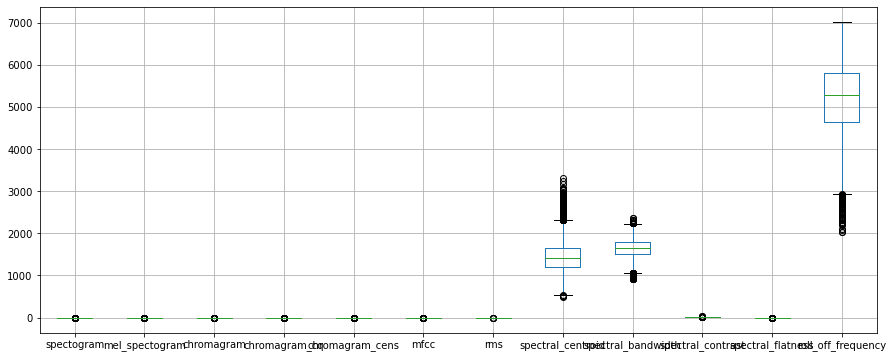

In [31]:
cols = df_sub.columns.tolist()
#Checking for Detecting Outliers
plt.subplots(figsize=(15,6))
boxplot = df.boxplot(column=cols)

In [32]:
df_sub.describe()

,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency
count,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000,54057.000000
mean,0.063059,0.011604,0.692511,0.600544,0.272767,-5.983121,0.004028,1453.012630,1647.391507,22.351036,0.000447,5201.327046
std,0.025227,0.008728,0.115256,0.093031,0.009592,1.294356,0.001574,355.777005,209.826442,1.109247,0.000325,757.453816
min,0.011692,0.000214,0.290711,0.200155,0.177543,-10.664822,0.000564,483.779455,907.249328,20.011189,0.000011,2021.648023
25%,0.043109,0.005015,0.599524,0.557246,0.271032,-6.938166,0.002863,1202.818443,1502.069907,21.465583,0.000221,4650.197635
50%,0.058028,0.007992,0.732653,0.620909,0.275126,-5.918948,0.003591,1420.091527,1657.969235,22.107501,0.000358,5279.756550
75%,0.083207,0.020057,0.789849,0.665356,0.278180,-5.080822,0.005676,1652.662821,1792.715745,23.209192,0.000586,5801.074898
max,0.180340,0.097718,0.881168,0.777581,0.286754,-2.680073,0.010241,3317.615405,2362.255614,26.781867,0.004953,7025.819542


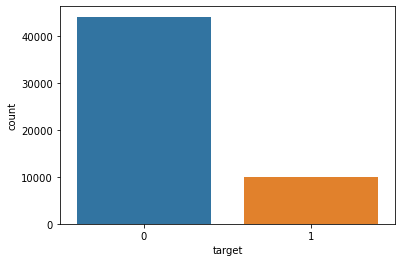

In [34]:
sn.countplot(x=df_test['target']);

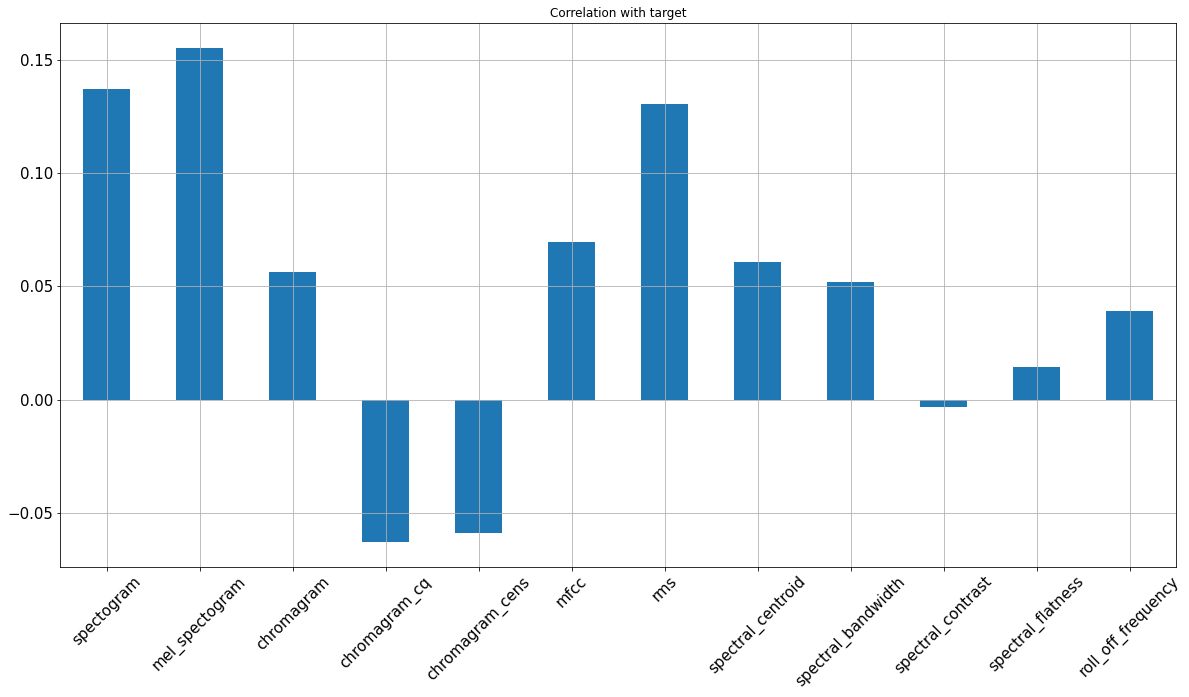

In [41]:
# Correlation with target with respect to attributes
df_sub.corrwith(df_test.target).plot.bar(
        figsize = (10, 10), title = "Correlation with target", fontsize = 15,
        rot = 45, grid = True);

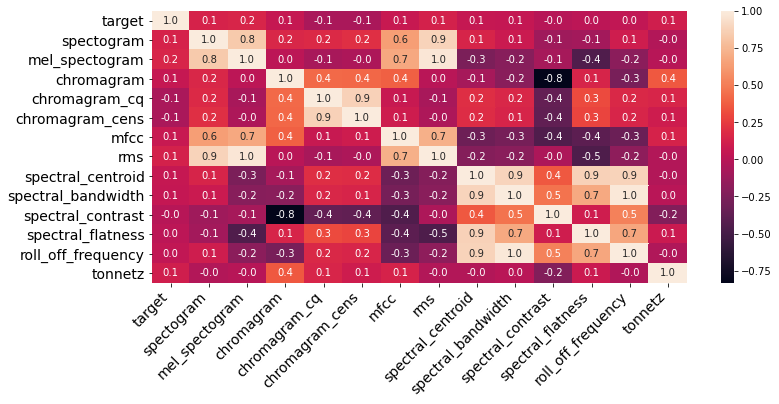

In [43]:
#correlation matrix
plt.figure(figsize=(12,5))
heatmap = sn.heatmap(df_test.corr(), annot=True, fmt=".1f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.show()

In [44]:
y = df_test['target']

In [45]:
df_test = df_test.drop('target', 1)

In [102]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.1,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(48651, 13) (48651,)
(5406, 13) (5406,)


In [103]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 5, n_estimators = 100,
                                    criterion = 'entropy')

In [104]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=5)

In [105]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

91.64

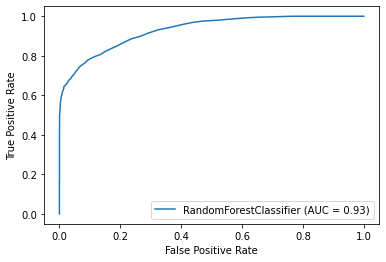

In [106]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

roc = plot_roc_curve(random_forest, X_test, Y_test)

In [107]:
random_forest.feature_importances_

array([0.09, 0.11, 0.07, 0.07, 0.06, 0.08, 0.1 , 0.07, 0.07, 0.06, 0.06,
       0.06, 0.07])

Feature ranking:
1. feature 1 (0.113266)
2. feature 6 (0.104341)
3. feature 0 (0.093367)
4. feature 5 (0.076927)
5. feature 2 (0.074711)
6. feature 12 (0.074530)
7. feature 7 (0.074186)
8. feature 3 (0.070648)
9. feature 8 (0.067928)
10. feature 9 (0.064527)
11. feature 11 (0.063609)
12. feature 10 (0.063551)
13. feature 4 (0.058410)


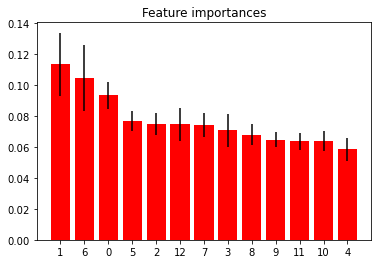

In [108]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix

In [110]:
y_pred = random_forest.predict(X_test)

In [111]:
print(f1_score(Y_test, y_pred, average="macro"))
print(precision_score(Y_test, y_pred, average="macro"))
print(recall_score(Y_test, y_pred, average="macro")) 

0.8352362714424426
0.9405344459874754
0.7837785079871165


In [112]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4391
           1       0.97      0.57      0.72      1015

    accuracy                           0.92      5406
   macro avg       0.94      0.78      0.84      5406
weighted avg       0.92      0.92      0.91      5406



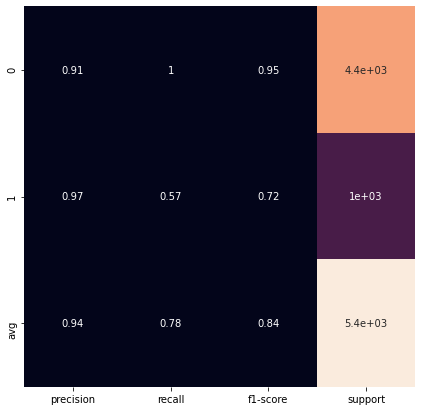

In [113]:
from sklearn.metrics import precision_recall_fscore_support



def plot_classification_report(y_tru, y_prd, figsize=(7, 7), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sn.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(Y_test, y_pred)

In [114]:
 from sklearn.metrics import plot_confusion_matrix

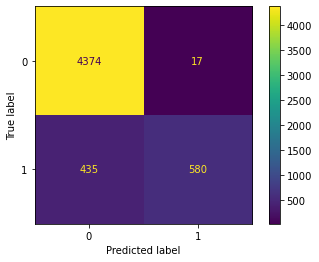

In [115]:
plot_confusion_matrix(random_forest, X_test, Y_test);